In [1]:
%matplotlib notebook

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pylab
from mpl_toolkits.mplot3d import Axes3D
#pylab.rcParams['figure.figsize'] = (16, 12)

In [2]:
ex1data1 = np.genfromtxt ('ex1data1.txt', delimiter=",")

<IPython.core.display.Javascript object>


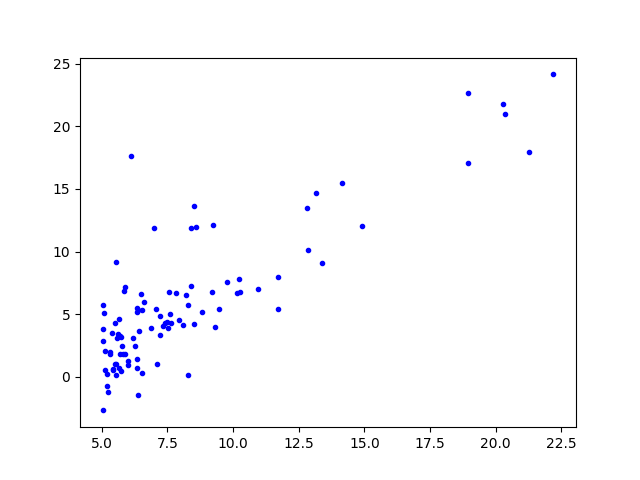

In [3]:
plt.figure()
plt.plot(ex1data1[:,0],ex1data1[:,1],'b.')

In [4]:
#add ones
X = np.c_[np.ones((len(ex1data1))), ex1data1[:,0]]
y = ex1data1[:,1]
theta = np.zeros(2)

In [5]:
def computeCost(X, y, theta):
    m = len(X)
    J = 0
    
    #J = sum((X*theta - y).^2)/(2*m);
    J = np.sum(np.power((np.matmul(X,theta) - y), 2)) / (2 * m)
    
    return J

In [6]:
# Some gradient descent settings
iterations = 1500;
alpha = 0.01;

print('\nTesting the cost function ...\n')
# compute and display initial cost
J = computeCost(X, y, theta);
print('With theta = [0 ; 0]\nCost computed = ' + str(J));
print('Expected cost value (approx) 32.07\n');


Testing the cost function ...

With theta = [0 ; 0]
Cost computed = 32.0727338775
Expected cost value (approx) 32.07



In [7]:
# further testing of the cost function
J = computeCost(X, y, [-1 , 2]);
print('\nWith theta = [-1 ; 2]\nCost computed = ' + str(J));
print('Expected cost value (approx) 54.24\n');


With theta = [-1 ; 2]
Cost computed = 54.242455082
Expected cost value (approx) 54.24



In [8]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(X)
    
    for x in range(iterations):
        hy = np.matmul(X, theta) - y
        theta = theta - alpha * np.matmul(hy, X) / m
        
        J_history.append(computeCost(X, y, theta))
        
    return theta


Running Gradient Descent ...

Theta found by gradient descent:

[-3.63029144  1.16636235]
Expected theta values (approx)

 -3.6303  1.1664




<IPython.core.display.Javascript object>


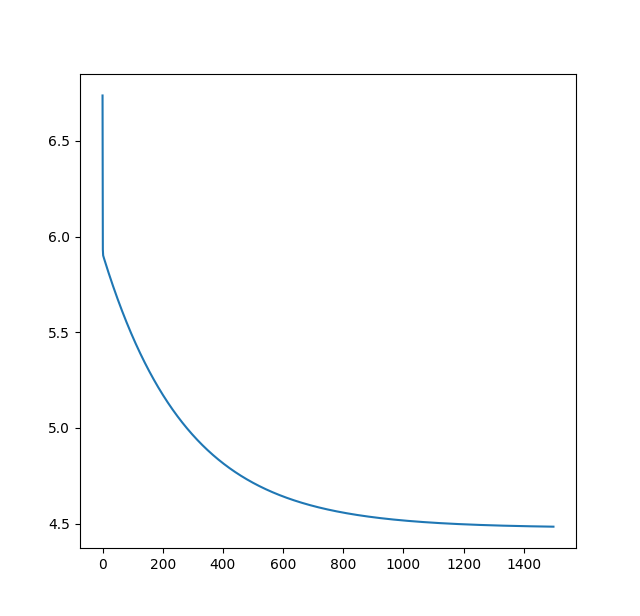

In [9]:
J_history = []
print('\nRunning Gradient Descent ...\n')
# run gradient descent
theta = gradientDescent(X, y, theta, alpha, iterations)

# print theta to screen
print('Theta found by gradient descent:\n');
print(theta);
print('Expected theta values (approx)\n');
print(' -3.6303  1.1664\n\n');
plt.figure()
plt.plot(range(len(J_history)), J_history)

<IPython.core.display.Javascript object>


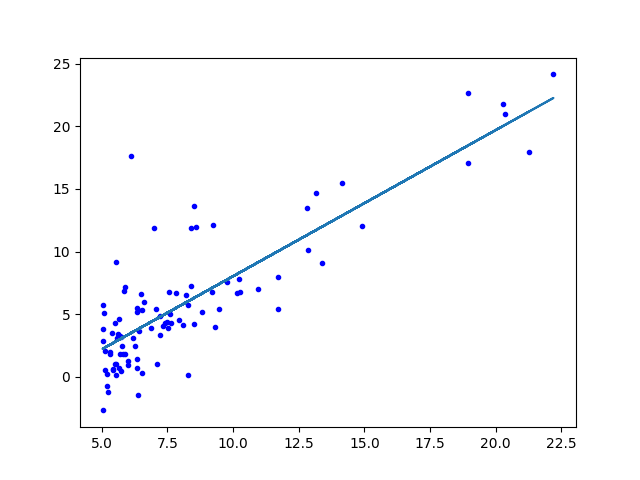

In [10]:
# Plot the linear fit
plt.figure()
plt.plot(ex1data1[:,0], ex1data1[:,1], 'b.')
plt.plot(ex1data1[:,0], np.matmul(X, theta))

In [11]:
predict1 = np.matmul([1, 3.5], theta)
print('For population = 35,000, we predict a profit of ' + str(predict1*10000));
predict2 = np.matmul([1, 7], theta);
print('For population = 70,000, we predict a profit of ' + str(predict2*10000));

For population = 35,000, we predict a profit of 4519.7678677
For population = 70,000, we predict a profit of 45342.4501294


<IPython.core.display.Javascript object>


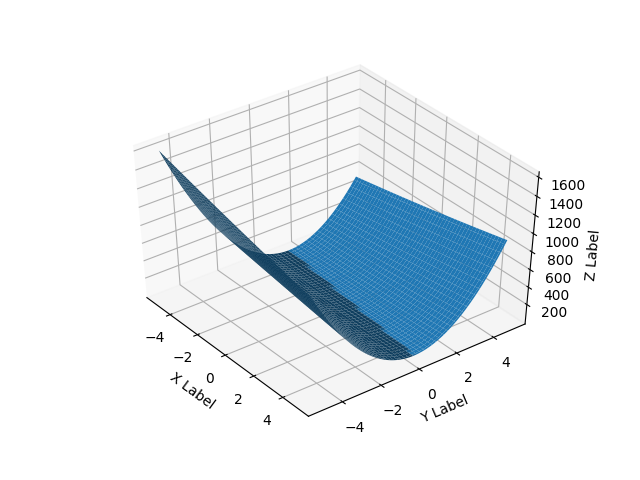

In [12]:
#visualize theta

theta0 = np.linspace(-5, 5, 100)
theta1 = np.linspace(-5, 5, 100);

def fun(t0, t1):
  return computeCost(X, y, (t0, t1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

pX, pY = np.meshgrid(theta0, theta1)
zs = np.array([fun(x,y) for x,y in zip(np.ravel(pX), np.ravel(pY))])
pZ = zs.reshape(pX.shape)

ax.plot_surface(pX, pY, pZ)

ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('cost')

plt.show()